In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

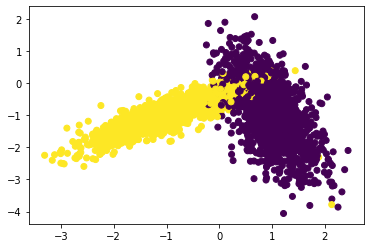

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#colors = {0:'orange', 1:'blue'}
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.show()

In [23]:
def RandomSearchCV(x_train,y_train, classifier,params, folds):
    train_scores = []
    test_scores = []
    x_train_split = []
    y_train_split = []
    
    
    #dividing x_train into groups  :https://stackoverflow.com/questions/1624883/alternative-way-to-split-a-list-into-groups-of-n
    for i in range(0, len(x_train), int(len(x_train)/folds)):
        x_train_split.append(x_train[i:i+int(len(x_train)/folds)])
        y_train_split.append(y_train[i:i+int(len(y_train)/folds)])

    # 3.for each hyperparameter that we generated in step 1 and dividing dataset into training and CV datasets:

    for parameter in params['n_neighbors']:
        trainscores_folds = []
        testscores_folds  = []

        for group in range(len(x_train_split)):
            x_train_group = np.concatenate(x_train_split[0:group] + x_train_split[group+1:])
            x_cv_group = x_train_split[group]
            y_train_group = np.concatenate(y_train_split[0:group] + y_train_split[group+1:])
            y_cv_group = y_train_split[group]

            # classifier (K-NN)
            classifier.n_neighbors = parameter
            classifier.fit(x_train_group, y_train_group)

            # Predicton
            Y_pred = classifier.predict(x_cv_group)
            testscores_folds.append(accuracy_score(y_cv_group, Y_pred))

            Y_pred = classifier.predict(x_train_group)
            trainscores_folds.append(accuracy_score(y_train_group, Y_pred))
        
        
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))

    return train_scores, test_scores



'\nneigh = KNeighborsClassifier()\n\n\nfolds = 3\nRandomSearchCV(X_train, y_train, neigh, folds)\n \n\n'

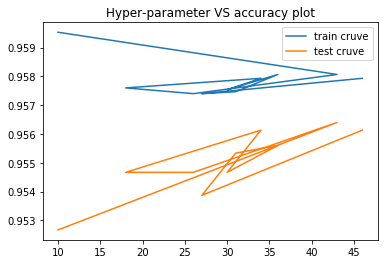

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
params = {'n_neighbors' : tuple(random.sample(range(0, 50), 10))}  # Declaring the parameter as the tuple

folds = 3

trainscores,testscores = RandomSearchCV(x_train, y_train, neigh,params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [6]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

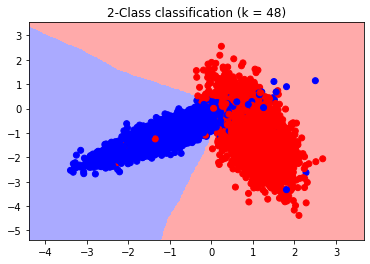

In [25]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 48)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)

In [22]:
params = {'neighb' : tuple(random.sample(range(0, 50), 10))}

type(params['neighb'])



tuple